# Keras Project Exercise - Loan devolution predictor

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. It is a classification problem so we will have to keep in mind the metrics for this kind of model

The "loan_status" column contains our label.

### Data Overview

----
----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

A feature information on the data as a .csv file for easy lookup throughout the notebook is provided:

In [597]:
import pandas as pd

In [598]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [599]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [600]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [601]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [603]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

We can already spot some null values in some of the features

In [605]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

In classification problems it is good to start checking if our labels are balanced. We can check that with a countplot


<AxesSubplot:xlabel='loan_status', ylabel='count'>

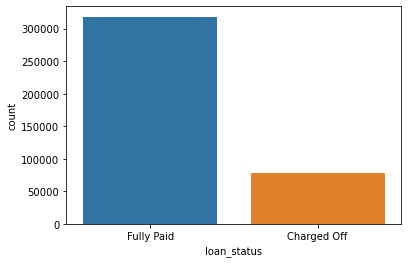

In [606]:
sns.countplot(x='loan_status', data=df)

We have an imbalanced dataset. The amount of Fully paid loans is three times higher then the ones charged-off

Now we can create a histogram to see what is the distribution of the loan amount feature

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

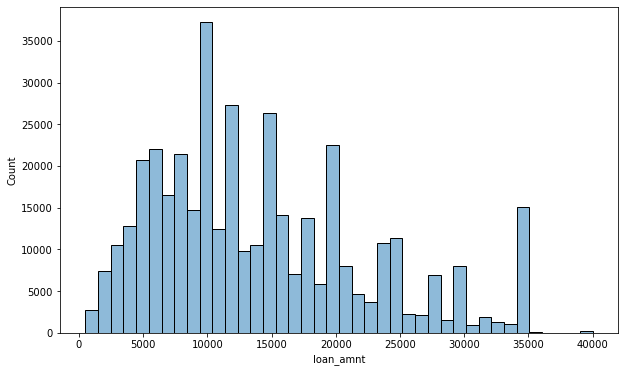

In [607]:
plt.figure(figsize=(10,6))
sns.histplot(x='loan_amnt',data=df, bins=40, alpha=0.5)

We can observe the mayority of the loans are between 500 and 25K. There is again a high peak at 35k.

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [608]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

To better visualize this matrix it is better to create a heatmap or a clustermap

<Figure size 720x576 with 0 Axes>

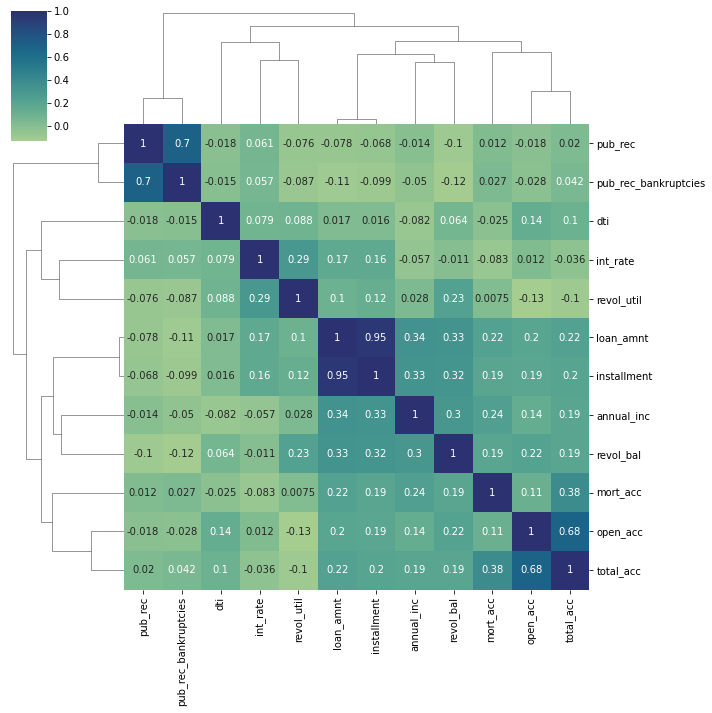

In [609]:
plt.figure(figsize=(10,8))
sns.clustermap(df.corr(),annot=True,cmap="crest")

We can observe a high correlation between the loan amount and the feature installment. Let's explore this feature further. 

Does this relationship make sense? 

Is there duplicate information here?

In [610]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [611]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

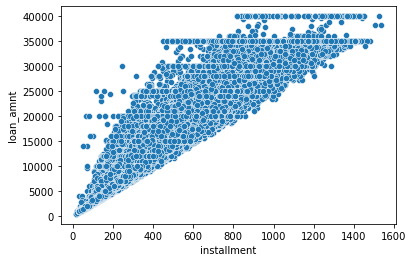

In [612]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

It doen't seem that the information is duplicate. For higher loans the installment has a high variation. but in the end but high correlation value makes sense, when the amount borrowed is higher the amount to give back every month also increases

Let's see now how the loan amount correlates to out lable. Are higher loans usually charged-off?

We can see that with a box plot

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

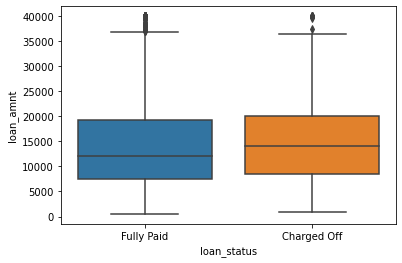

In [613]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

We can see there the amount borrowed doesn't strongly determine if the loan is fully paid. Just the average value is a bit higher. To see this information in more detail will we can create a summary matrix grouped by the loan status  

In [614]:
grp=df.groupby('loan_status')['loan_amnt']
grp.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


With it we can confirm that both labels are very similar with respect to this feature

Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. We can start with checking how many unique values are possible

In [615]:
feat_info('grade')

LC assigned loan grade


In [616]:
feat_info('sub_grade')

LC assigned loan subgrade


In [617]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [618]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

There are 7 different grades and 5 subgrades per grade. Let's see how the lables distribute among the 7 grades with a countplot

<AxesSubplot:xlabel='grade', ylabel='count'>

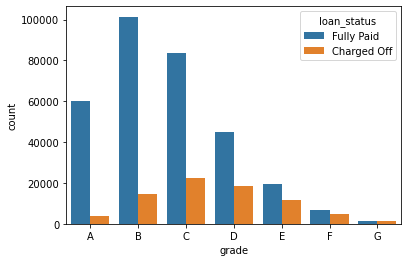

In [619]:
sns.countplot(x='grade',data=df,hue='loan_status', order=sorted(df['grade'].unique()))

Grades A, B, C and D seem to have the highest amount of unpaid loans. HHowever they are also the most common ones and mainly they are paid back. in the case of E, F and G the difference between paid and unpaid loans gets smaller. being more likely to have an unpaid loan in one of these classes.

We can now explore the sub-grades in a similar way

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

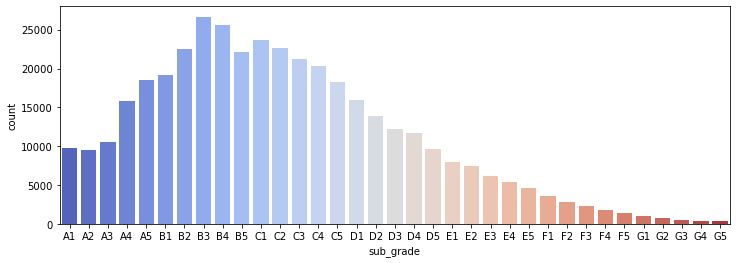

In [620]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()),
             palette='coolwarm')

We can also split this observation by the lable

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

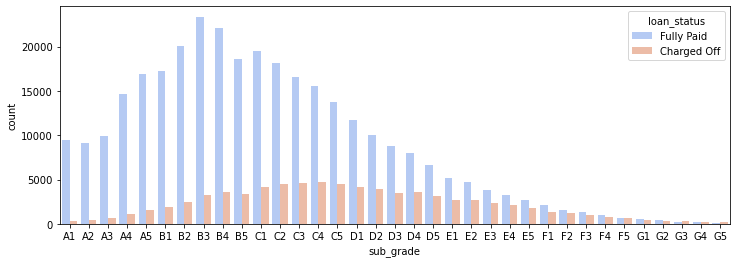

In [621]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()),
             palette='coolwarm', hue='loan_status')

With this we can recorfirm what we observed with the grades. Subgrades F and G are more likely to remain unpaid.

We can now recreate the count plot with just these two subgrades and see more in detail what is the situation there

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

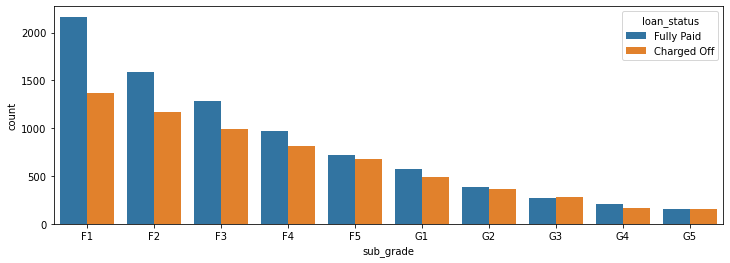

In [622]:
df_F=df[df['grade']==('F')]
df_G=df[df['grade']==('G')]
bad_grades = pd.concat([df_F,df_G])

plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=bad_grades,hue='loan_status',
             order=sorted(bad_grades['sub_grade'].unique()))

With this we can see that the "higher" the sub grade the more like is the loan to remain unpaid

Now it is time to transform the lable into a boolean variable of 0s and 1s. 0 Will mean that the loan remains unpaid

In [623]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [624]:
df['loan_repaid']=df['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [625]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


With this new label we can look at the correlation of the rest of numerical values with it. Let's use a bar plot for it

<AxesSubplot:>

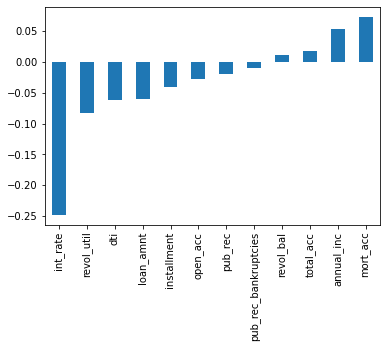

In [626]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

The highest correlation is between the label and the interest rate, however the value is still low

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [627]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

Let's explore this missing data columns. We can use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.

First of all let's look at the length of the dataframe

In [628]:
len(df)

396030

It would also be import to know how many missing values per feature are there

In [629]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

This can also be expressed in percentage to have a better perspective on the dimensions

In [630]:
df.isnull().sum()/396030*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

The number of mortage accounts seems to have the highest amount of missing data.

emp_title and emp_legth have also quite some missing data. We can start analyzing them to see if they have any influence in the label and explore the possibility to drop them

In [631]:
# CODE HERE

In [632]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


The employment length could be significant since people who work longer in jobs tend to earn more. The title however could be problematic. We can explore how many different titles are there.

In [633]:
df['emp_title'].nunique()

173105

In [634]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [635]:
df=df.drop('emp_title',axis=1)

We could now create a countplot to see the amount of years people have been in their jobs and their relation to unpaid loans

In [636]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [637]:
sorted_length=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

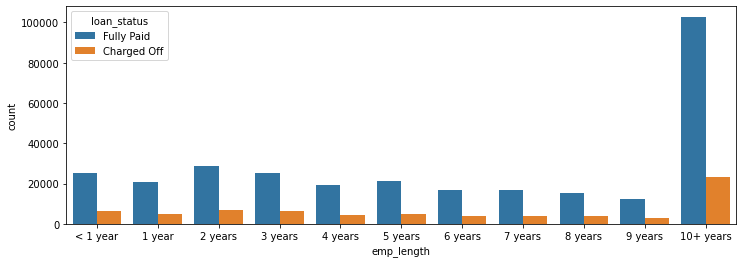

In [638]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=sorted_length, hue='loan_status')

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the ratio of charge offs per category. Essentially informing us what is the ratio between unpaid and paid loans per employment category. We can depict this result in a bar plot.

In [639]:
unpaid_per_year=pd.DataFrame(df[df['loan_repaid']==0]['emp_length'].value_counts())
loans_per_year=pd.DataFrame(df[df['loan_repaid']==1]['emp_length'].value_counts())
df_ratio=unpaid_per_year/loans_per_year
df_ratio.rename(columns={'': 'emp_length', 'emp_length': 'ratio'}, inplace=True)
df_ratio=df_ratio.transpose()
df_ratio=df_ratio[['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']]
df_ratio=df_ratio.transpose()
df_ratio

,ratio
< 1 year,0.260830
1 year,0.248649
2 years,0.239560
3 years,0.242593
4 years,0.238213
5 years,0.237911
6 years,0.233341
7 years,0.241887
8 years,0.249625
9 years,0.250735


<AxesSubplot:>

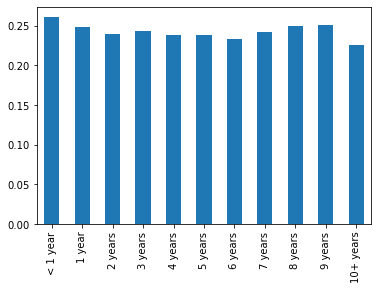

In [640]:
df_ratio.plot(kind='bar', legend=False)

Charge off rates are extremely similar across all employment lengths. This doesn't give us any significant information we can drop this column

In [641]:
df=df.drop('emp_length',axis=1)

Let's revisit the DataFrame to see what feature columns still have missing data

In [642]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

We can now review the title column. How much does this information differ from the purpose column?

In [643]:
print('Purpose:')
feat_info('purpose')
print('\n')
print('Title:')
feat_info('title')

Purpose:
A category provided by the borrower for the loan request. 


Title:
The loan title provided by the borrower


In [644]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [645]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

We can conclude that the title column is simply a string subcategory/description of the purpose column. We can go ahead and drop the title column

In [646]:
df=df.drop('title',axis=1)

Now we can move into investigating the mort_acc feature

First let's find out what does it represent

In [647]:
print('mort_acc:')
feat_info('mort_acc')

mort_acc:
Number of mortgage accounts.


We can now see how many different values are there

In [648]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

There are many ways we could deal with this missing data. 
* We could attempt to build a simple model to fill it in, such as a linear model, 
* we could just fill it in based on the mean of the other columns, 
* we could even bin the columns into categories and then set NaN as its own category. 

We start reviewing the other columns to see which most highly correlates to mort_acc

In [649]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc 

In [650]:
print('total_acc:')
feat_info('total_acc')

total_acc:
The total number of credit lines currently in the borrower's credit file


The correlation makes sense. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry

In [651]:
by_total_acc=df.groupby('total_acc').mean()['mort_acc']
by_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. 

In [652]:
by_total_acc[2.0]

0.0

In [653]:
def f(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return by_total_acc[total_acc]
    else:
        return mort_acc

df['mort_acc'] = df.apply(lambda x: f(x['total_acc'], x['mort_acc']), axis=1)

In [654]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. We can remove the rows that are missing those values in those columns with dropna()

In [655]:
df=df.dropna()

In [656]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns


In [657]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')


Let's now go through all the string features to see what we should do with them.


### term feature

Let' see firts what it means and which values it has

In [658]:
print('term:')
feat_info('term')

term:
The number of payments on the loan. Values are in months and can be either 36 or 60.


In [659]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [660]:
df['term'][0][1:3]

'36'

Apparently the value can only be 36 or 60. We can convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [661]:
df['term']=df['term'].apply(lambda term: int(term[1:3]))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [662]:
df.select_dtypes(include='object').columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### grade and sub_grade features

We already know grade is part of sub_grade, so just drop the grade feature

In [663]:
df=df.drop('grade', axis=1)

We can convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [664]:
sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True)

In [665]:
df = df.drop('sub_grade',axis=1)

In [666]:
df = pd.concat([df,sub_grade],axis=1)

In [667]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [668]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### home_ownership

Let's review the information and value_counts for the home_ownership column

In [669]:
print('home_ownership')
feat_info('home_ownership')

home_ownership
The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [670]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

We can convert these to dummy variables, but before we could NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. 


In [671]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [672]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,home_ownership],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [673]:
df.select_dtypes(include='object').columns

Index(['verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
After investigating these features we can decide if it is worth to convert them into dummy variables

In [674]:
df.select_dtypes(include='object').head()

,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [675]:
print('verification_status:')
feat_info('verification_status')
print('\n')
print('initial_list_status:')
feat_info('initial_list_status')
print('\n')
print('application_type:')
feat_info('application_type')
print('\n')
print('purpose:')
feat_info('purpose')

verification_status:
Indicates if income was verified by LC, not verified, or if the income source was verified


initial_list_status:
The initial listing status of the loan. Possible values are – W, F


application_type:
Indicates whether the loan is an individual application or a joint application with two co-borrowers


purpose:
A category provided by the borrower for the loan request. 


In [676]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [677]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

The feature purpose will create quite some categories. We will try continue like that but a way to reduce complexity would be to include the categories 'renewabe_energy' and 'educational' in other as they have the least amount of values

In [678]:
dummies = pd.get_dummies(df[['verification_status', 'initial_list_status', 
                            'application_type', 'purpose']],
                         drop_first=True)
df = df.drop(['verification_status', 'initial_list_status',
              'application_type', 'purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation',

In [679]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

### address

Let's explore the feature address and see if we can extract the zipcode information and convert it into a dummy variable

In [680]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [681]:
df['zip_code']=df['address'].apply(lambda address: address[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

There are not that many different zip codes, we can convert it into dummies

In [682]:
zip_code = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,zip_code],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_w

In [683]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

### issue_d 

If we are trying to create a model that predicts if the loan should be issued or not we would not need this variable. Loan that would not be issued will not have a date. This could cause data leakage. We can drop this feature.

In [684]:
df=df.drop('issue_d',axis=1)

In [685]:
df.select_dtypes(include='object').columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

### earliest_cr_line
This appears to be a historical time stamp feature. We can extract the year from this feature and then convert it to a numeric feature.

In [686]:
print('earliest_cr_line:')
feat_info('earliest_cr_line')
print('\n')
df['earliest_cr_line'].head()

earliest_cr_line:
The month the borrower's earliest reported credit line was opened




0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [687]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda earliest_cr_line: earliest_cr_line[-4:])
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: object

In [688]:
df=df.drop('earliest_cr_line',axis=1)

In [689]:
df['earliest_cr_year']=df['earliest_cr_year'].apply(lambda earliest_cr_line: int(earliest_cr_line[-4:]))

In [690]:
df.select_dtypes(include='object').columns

Index(['loan_status'], dtype='object')

## Train Test Split

We re now ready to start splitting out dataset into training and test data

In [691]:
from sklearn.model_selection import train_test_split

We can also drop the column loan_status since we already created the loan_repaid feature which is written in terms of 1 and 0

In [692]:
df=df.drop('loan_status',axis=1)

Now we can define the X and y variables

In [693]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

We can now perform the train test split on the selected sample

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

We need to normalize the data. For that we will use the MinMaxScaler. We will only fit the scaler to the X_train set to avoid data leakage but we will also use it on X_test

In [696]:
from sklearn.preprocessing import MinMaxScaler

In [697]:
scaler = MinMaxScaler()

In [698]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

Now we can move into creating the model. It will be a sequential model with dense layers. We will also try to apply droup layers to avoid overfitting.

First of all we can do all the required imports

In [699]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Following [common recommendations](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw) we will define:
* an input layer with the same amount of neurons as the features we have,
* a hidden layer with half of the amount of neurons as the input layer and
* an output layer with just one neuron
All layers will use the rectified linear unit as activation function appart from the output layer which will use the sigmoid function

For compiling the model, since we are working on a classification problem the loss function will be the binary cross-entropy function and as optimizer we will used adam

In [701]:
X_train.shape

(316175, 78)

In [702]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dense(units=39, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

We can now fit the model to the training data. We will start training for 25 epochs, adding validation data for later supervision and we will add a batch size of 256 to reduce the possibility of overfitting.

In [704]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/25
1236/1236 [==============================] - 4s 2ms/step - loss: 0.2892 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2624 - val_loss: 0.2693
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2613 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2598 - val_loss: 0.2617
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2590 - val_loss: 0.2628
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2587 - val_loss: 0.2648
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2582 - val_loss: 0.2638
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2573 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2571 - val_loss: 0.2619
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.256

We can now save this model

In [205]:
# CODE HERE

In [705]:
from tensorflow.keras.models import load_model

In [706]:
model.save('loans_project_model_01.h5')

# Section 3: Evaluating Model Performance.

Plotting the traing loss and the validation loss will give us a hint about how well our training went

In [707]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

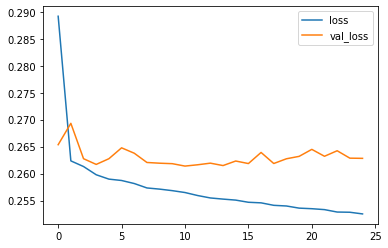

In [708]:
model_loss.plot()

We dont see the validation loss increasing. This is good. means no overfitting is happening. However both loss curves could develop closer to each other. We can try to use dropout layers and see if the results improve.

In [709]:
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [710]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2931 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2643 - val_loss: 0.2640
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2622 - val_loss: 0.2633
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2618
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2601 - val_loss: 0.2616
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2595 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2590 - val_loss: 0.2610
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2589 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2585 - val_loss: 0.2609
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.258

<AxesSubplot:>

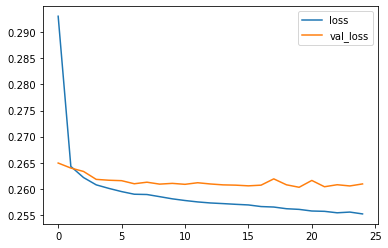

In [712]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This clearly brings an improvement in the vaidation loss which shows a lower noise level and is closer to the training loss

Now we can move into creating the predictions variable with the test set and comparing it to the test labels to create a classification matrix that gives us some parameters to evaluate the model

In [713]:
from sklearn.metrics import classification_report, confusion_matrix

In [720]:
predictions = (model.predict(X_test) > 0.5)*1

2471/2471 [==============================] - 2s 865us/step


In [723]:
print('Classification report:')
print (classification_report(y_test, predictions))
print ('\n')
print ('Confussion matrix:')
print (confusion_matrix(y_test,predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confussion matrix:
[[ 7008  8650]
 [  228 63158]]


From the classification report we can observe that although the precission and the accuracy have high values, the recall could be improved. The confussing matrix show that we missclassifies around 9000 loans from 70K examples we had

Now we can move into anwsering the question of predicting the case of a new customer. We will pick up a random example from our orignal dataset df

In [724]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [725]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer
#new_prediction = (model.predict(new_customer) > 0.5)*1

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [726]:
new_prediction = (model.predict(new_customer) > 0.5)*1
new_prediction

1/1 [==============================] - 0s 20ms/step


array([[1]])

Now let's check if this person actually end up paying back their loan

In [728]:
df.iloc[random_ind]['loan_repaid']

1.0

# End of the exercise
## Credits
Dataset preparation and excersise guidance:

Pierian Data & Jose Marcial Portilla